<a href="https://colab.research.google.com/github/GabrieleKasputyte/Duomenu-gavyba/blob/main/Classification_multivariate_normal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linearly separable case with unity covariance matrix
This is nearest mean classifier

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

m1 = np.array([0, 0])
m2 = np.array([5, 5])
sigma = [[1, 0], [0, 1]]  # diagonal covariance

#class 1 
x1 = np.random.multivariate_normal(m1, sigma, 1000)
y1 = np.repeat(0, 1000)
#class 2
x2 = np.random.multivariate_normal(m2, sigma, 1000)
y2 = np.repeat(1, 1000)

In [ ]:
y_class = np.concatenate((y1, y2), axis=None)

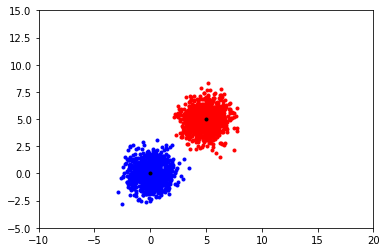

In [ ]:
import numpy as np

# axis limits
xr = np.array([-10,20])

yr = np.array([-5,15])

import matplotlib.pyplot as plt
plt.plot(x1[:,0], x1[:,1], 'b.', x2[:,0], x2[:,1], 'r.', m1[0], m1[1], 'k.', m2[0],m2[1], 'k.')
plt.axis(np.concatenate((xr, yr)))
plt.show()

Compute classifier.

Estimate the common covariance matrix

In [ ]:
import numpy as np

c1 = np.cov(x1.T)
c2 = np.cov(x2.T)

c = 0.5 *(c1+c2)
print(c)

m = m1-m2
print(m)

[[1.00028119 0.04255703]
 [0.04255703 0.98508607]]
[-5 -5]


Compute LDC weights

In [ ]:
from numpy.linalg import inv
w = np.matmul(m.T, inv(c))
#lets normalize vector w
wn = w/np. linalg. norm(w)
print(w,wn)

[-4.79145521 -4.86870134] [-0.70143007 -0.71273828]


This is nearest mean classifier. The w equal to m and it is an optimal direction to project. The class points w is a row vector; for dot product it should be multiplied by the column vector. The x1 should be transposed.

Lets project the points on the direction wn

In [ ]:
p1 = np.matmul(wn, x1.T)
#print(p1[1])
p2 = np.matmul(wn, x2.T)

p1 and p2 are projected class points onto direction m. 
pot their histogram

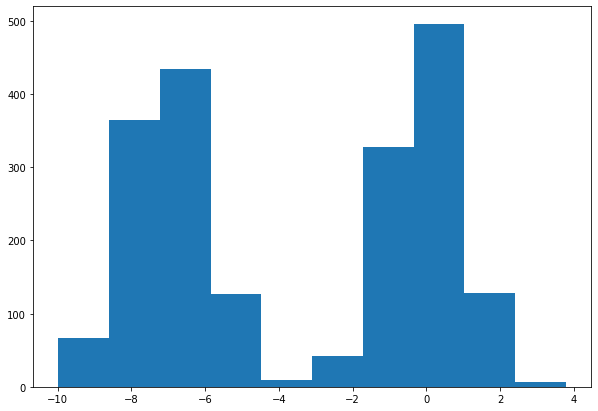

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(np.concatenate((p1,p2))) 
plt.show() 

b in this scenario is a point in the middle of the vector that is connecting m1 and m2 it is (2.5, 2.5). lets project it onto wn and this will be our b

In [ ]:
b= np.matmul(wn, [2.5,2.5])
print(b)

-3.535420877069963


classification rule is  compute z=wn%*%x-b compare it with threshold T, if z< 0 then class 1 otherwise class2 

[ 0.52631467 -0.90011227 -0.93209944  0.0188195   0.94048092  0.53983195
  0.65244821 -0.76684753 -1.63188149] [4.061735543548772, 2.635308610625839, 2.6033214336668395, 3.554240373400062, 4.475901794387364, 4.075252826463353, 4.187869090690836, 2.7685733509155166, 1.903539388970814]


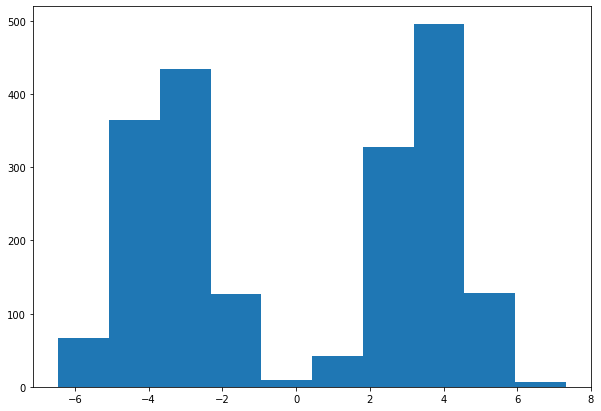

In [ ]:
p1_1 = [i - b for i in np.matmul(wn, x1.T)]
p2_1 = np.matmul(wn, x2.T)-b

print(p1[1:10],p1_1[1:10])

fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(np.concatenate((p1_1,p2_1))) 
plt.show() 

p = np.concatenate((p1_1, p2_1))

This is artificially created to show  meaning of confuson table and ROC Classification by applying threshold if w%*%x > T then class1 , if < T then class2 T range

In [ ]:
p= np.concatenate((p1,p2))

N= len(y_class)
print(N)

Tr = np.linspace(start=-20, stop=20, num=41)
print(Tr)

#TPR  = np.repeat(0, len(Tr))
#FPR  = np.repeat(0, len(Tr))



2000
[-20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.
  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.
   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]


In [ ]:
from collections import Counter
import collections
TPR = []
FPR = []
i=0
for T in Tr:
  r = pd.Series(1*(p<T), dtype="category")
  r = r.cat.set_categories([0,1])
  t = pd.crosstab(y_class, r, rownames=['y_class'], colnames=['rf'],dropna=False)
  print(t)
  # True positives and True Negatives
  # in other words correct classifications
  # are on diagonal of the confusion table
  correctc=sum(numpy.diag(t))
  print(correctc)
  # false classifications are 
  # off diagonal
  falsec=t[0][1]+t[1][0]
  print(falsec)
  # We want a choice of threshold 
  # to maximize correctc and minimize falsec RATE
  tpr=correctc/N
  fpr=falsec/N
  TPR.append(tpr)
  FPR.append(fpr)
 
 


rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000  0
1000
1000
rf          0  1
y_class         
0        1000  0
1        1000

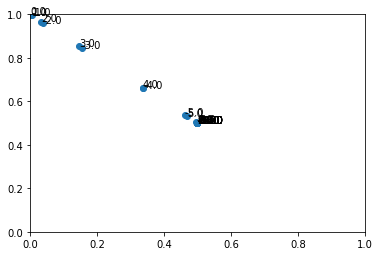

In [ ]:
fig, ax = plt.subplots()
ax.scatter(FPR, TPR)
ax.set(xlim=(0, 1), ylim=(0, 1))

for i, txt in enumerate(Tr):
    ax.annotate(txt, (FPR[i], TPR[i]))



# LETS make data nonseparable
 Linearly separable case with common covariance matrix

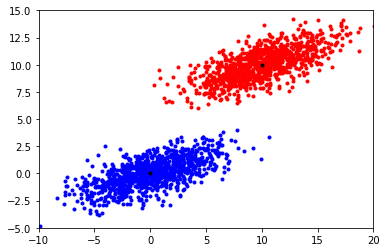

In [ ]:
m1 = np.array([0, 0])
m2 = np.array([10, 10])
sigma = [[10, 3], [3, 2]] 

x1 = np.random.multivariate_normal(m1, sigma, 1000)
y1 = np.repeat(0, 1000)

x2 = np.random.multivariate_normal(m2, sigma, 1000)
y2 = np.repeat(1, 1000)

xr = np.array([-10,20])

yr = np.array([-5,15])

import matplotlib.pyplot as plt
plt.plot(x1[:,0], x1[:,1], 'b.', x2[:,0], x2[:,1], 'r.', m1[0], m1[1], 'k.', m2[0],m2[1], 'k.')
plt.axis(np.concatenate((xr, yr)))
plt.show()

In [ ]:
c1 = np.cov(x1.T)
c2 = np.cov(x2.T)

c = 0.5 *(c1+c2)
print(c)

m = m1-m2
print(m)

[[10.15506881  3.0245567 ]
 [ 3.0245567   1.99932338]]
[-10 -10]


In [ ]:
w = np.matmul(m.T, inv(c))
wn = w/np. linalg. norm(w)